## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

## Load **Dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

df.head()


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Data Preparation

### Data **Separation** as x and y

In [ ]:
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


### Data **Splitting** into Train 80% & Test 20%

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [ ]:
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


In [ ]:
y_test

,logS
822,-3.380
118,-8.010
347,-2.160
1123,-1.170
924,-0.730
...,...
1114,-4.130
427,-9.018
711,-0.600
4,-3.040


# Building **Models**

### Linear Regression

#### Training The Model

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Predictions

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [ ]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Evaluate Model Performance

In [ ]:
# Training Set Metrics
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# Test Set Metrics
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print(f"Linear Regression Performance:")

print(f"Train MSE: {lr_train_mse:.4f}")
print(f"Train R²: {lr_train_r2:.4f}")

print(f"Test MSE: {lr_test_mse:.4f}")
print(f"Test R²: {lr_test_r2:.4f}")


Linear Regression Performance:
Train MSE: 1.0075
Train R²: 0.7645
Test MSE: 1.0207
Test R²: 0.7892


##### Displaying in Pandas Data Frame

In [ ]:
lr_result = pd.DataFrame(['Linear Regression',
                          lr_train_mse,
                          lr_train_r2,
                          lr_test_mse,
                          lr_test_r2]).transpose()
lr_result.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [ ]:
lr_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forest

#### Training Model

In [ ]:
rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Predictions

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
y_rf_train_pred

array([-4.44388581, -1.40132433, -1.41481453, -1.41481453, -1.44411435,
       -2.67492782, -2.50755276, -3.95611327, -4.62529592, -2.27343298,
       -2.69241199, -4.5150244 , -1.41481453, -2.67492782, -7.14501987,
       -2.30422396, -4.0676017 , -3.36086239, -2.53282364, -4.5150244 ,
       -2.47178242, -4.0676017 , -2.66143763, -1.42912192, -1.2164651 ,
       -7.14501987, -2.67492782, -2.47178242, -7.14501987, -1.2164651 ,
       -4.5150244 , -1.2164651 , -7.14501987, -1.41481453, -1.64246378,
       -4.5150244 , -4.5150244 , -1.41481453, -2.71012897, -1.64246378,
       -2.42959807, -2.89446137, -2.47178242, -1.24495146, -2.69241199,
       -1.2164651 , -1.2164651 , -4.65157679, -2.6279475 , -1.2164651 ,
       -1.79134844, -4.5150244 , -1.2164651 , -4.44388581, -4.62529592,
       -4.0676017 , -4.5150244 , -2.66143763, -1.41481453, -4.0676017 ,
       -2.67492782, -1.40132433, -3.32568382, -2.51725697, -4.44388581,
       -7.14501987, -7.14501987, -1.44411435, -4.5150244 , -1.42

In [ ]:
y_rf_test_pred

array([-3.97313718, -7.14501987, -2.47178242, -2.40196468, -1.44411435,
       -1.40132433, -1.2164651 , -1.41481453, -7.14501987, -4.5150244 ,
       -4.5150244 , -2.27343298, -1.83979246, -1.24495146, -4.5150244 ,
       -1.40132433, -1.24495146, -2.67492782, -2.67492782, -4.65157679,
       -3.00915981, -4.62529592, -7.12312525, -2.47657839, -4.5150244 ,
       -4.5150244 , -4.5150244 , -4.5150244 , -4.44388581, -1.2164651 ,
       -1.41481453, -2.67492782, -2.67492782, -1.42961706, -1.40132433,
       -2.27343298, -2.0381419 , -2.67492782, -4.5150244 , -1.38740573,
       -1.2164651 , -1.61447629, -7.14501987, -7.14501987, -7.12312525,
       -4.42408609, -2.0381419 , -1.41481453, -1.41481453, -2.50541484,
       -1.83979246, -4.5150244 , -1.2164651 , -2.6279475 , -4.62529592,
       -1.42912192, -7.14501987, -1.2164651 , -1.41481453, -4.62529592,
       -1.62796649, -2.69241199, -2.67492782, -2.66143763, -1.2164651 ,
       -1.23077249, -2.67492782, -4.00999869, -1.41481453, -4.21

#### Evaluate Model Perfromance

In [ ]:
# Training Set Metrics
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# Test Set Metrics
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print(f"Random Forest Performance:")

print(f"Train MSE: {rf_train_mse:.4f}")
print(f"Train R²: {rf_train_r2:.4f}")

print(f"Test MSE: {rf_test_mse:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")


Random Forest Performance:
Train MSE: 1.0282
Train R²: 0.7597
Test MSE: 1.4077
Test R²: 0.7092


##### Displaying in Pandas Data Frame

In [ ]:
rf_result = pd.DataFrame(['Random Forest',
                          rf_train_mse,
                          rf_train_r2,
                          rf_test_mse,
                          rf_test_r2]).transpose()
rf_result.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

In [ ]:
rf_result

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Models Comparison

In [ ]:
df_models = pd.concat([lr_result, rf_result], axis=0).reset_index()
df_models

,index,Method,Training MSE,Training R2,Test MSE,Test R2
0,0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,0,Random Forest,1.028228,0.759669,1.407688,0.709223


# Data Visualization of Prediction Results

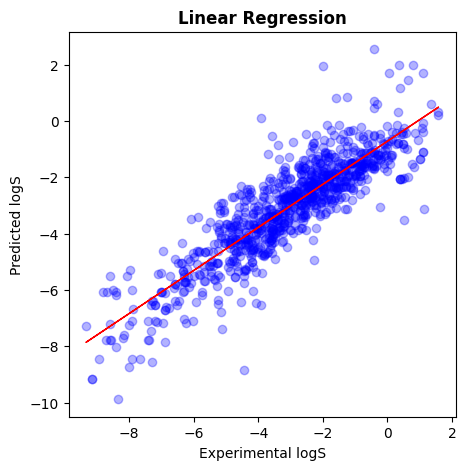

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, color='blue', alpha = 0.3)
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')
plt.title('Linear Regression',fontweight='bold')

# Calculate the best-fit line (first-degree polynomial)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

# Plot the best-fit line
plt.plot(y_train, p(y_train), color='red', linewidth=1)


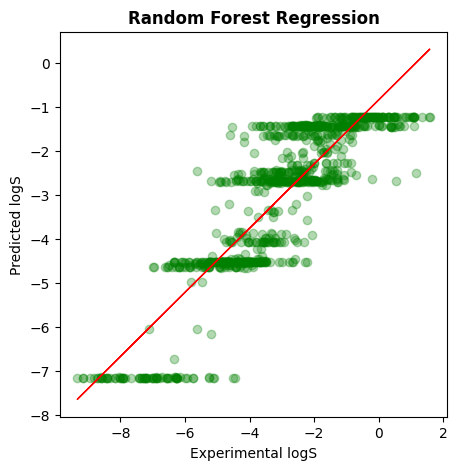

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 📊 Metrics (Optional, for display if needed)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

# 📈 Scatter Plot with Best-Fit Line
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, color='green', alpha=0.3)
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')
plt.title('Random Forest Regression', fontweight='bold')

# 🔴 Best-Fit Line
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linewidth=1)

plt.show()


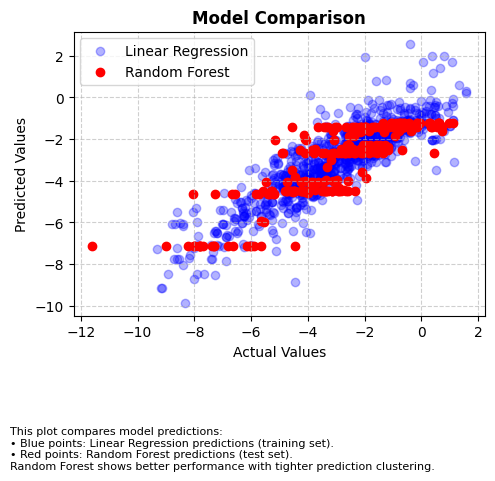

In [ ]:
import matplotlib.pyplot as plt

# Create smaller figure
plt.figure(figsize=(5, 4))

# Your existing plot
plt.scatter(x=y_train, y=y_lr_train_pred, color='blue', alpha=0.3)
plt.scatter(x=y_test, y=y_rf_test_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Comparison', fontweight='bold')
plt.legend(['Linear Regression', 'Random Forest'])
plt.grid(True, linestyle='--', alpha=0.6)

# Explanation text
explanation_text = (
    "This plot compares model predictions:\n"
    "• Blue points: Linear Regression predictions (training set).\n"
    "• Red points: Random Forest predictions (test set).\n"
    "Random Forest shows better performance with tighter prediction clustering."
)

# Place explanation closer under the plot
plt.figtext(0.02, -0.08, explanation_text, ha='left', va='top', fontsize=8, wrap=True)

# Adjust layout to remove extra white space
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Display
plt.show()
